<a href="https://colab.research.google.com/github/lijingwang/dssg_cv_tutorial/blob/main/convolutional_neural_network_dssg_tutorial_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Stanford Data Science for Social Good](https://datascience.stanford.edu/programs/data-science-social-good-summer-program) tutorial session**

**Author**: Lijing Wang lijing52@stanford.edu, 2021

**Slide deck**:[ Introduction to convolutional neural network for computer vision ](https://docs.google.com/presentation/d/1R4V9rxTwoQxppvGD9EHc_cJPdppN4bgcG3Oqu7oeUcc/edit?usp=sharing)

# Import necessary python modules

In [1]:
# set up cell
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.data import Dataset
from tensorflow import keras
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Using GPU

You can manually switch to a GPU device on Colab by clicking `Runtime -> Change runtime type` and selecting `GPU` under `Hardware Accelerator`. You should do this before running the following cells to import packages, since the kernel gets restarted upon switching runtimes.

In [2]:
import os
import math
import timeit

USE_GPU = True

if USE_GPU:
    device = '/device:GPU:0'
else:
    device = '/cpu:0'

print('Using device: ', device)

Using device:  /device:GPU:0


# Load the CIFAR-10 dataset

Let's load the CIFAR-10 dataset and visualize the input images

In [3]:
# load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# CIFAR-10 classes
cifar_10_classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                             'dog', 'frog', 'horse', 'ship', 'truck'])

In [4]:
print(X_train.shape)  # 50,000 training data, image: 32 x 32 x 3 

(50000, 32, 32, 3)


## Visualize the dataset

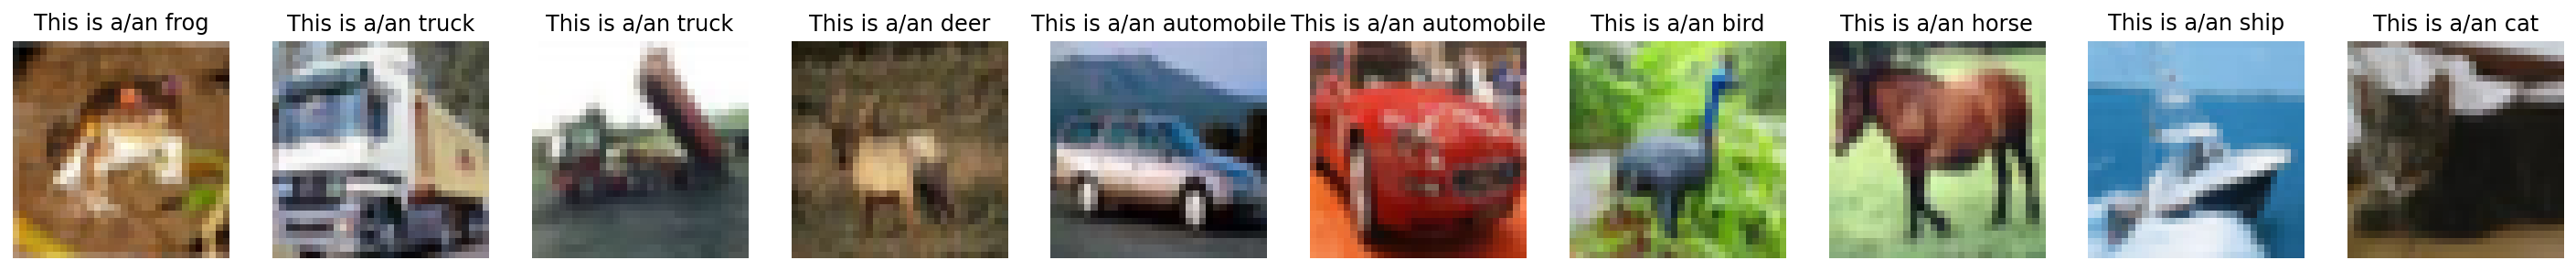

In [5]:
plt.figure(figsize=[25,3])
for i in np.arange(10): 
    ax = plt.subplot(1, 10, i+1)
    ax.imshow(X_train[i,:,:,:])
    ax.set_title('This is a/an '+cifar_10_classes[y_train[i,0]])
    ax.axis('off')

# 1. Convolution kernels/filters: Image processing using convolutions

For simplicity, let's first transfer the images into the grayscale and see how different kernels/filters work. 

In [6]:
X_train_gray = X_train[:,:,:,0]*0.3 + X_train[:,:,:,1]*0.6 + X_train[:,:,:,2]*0.1

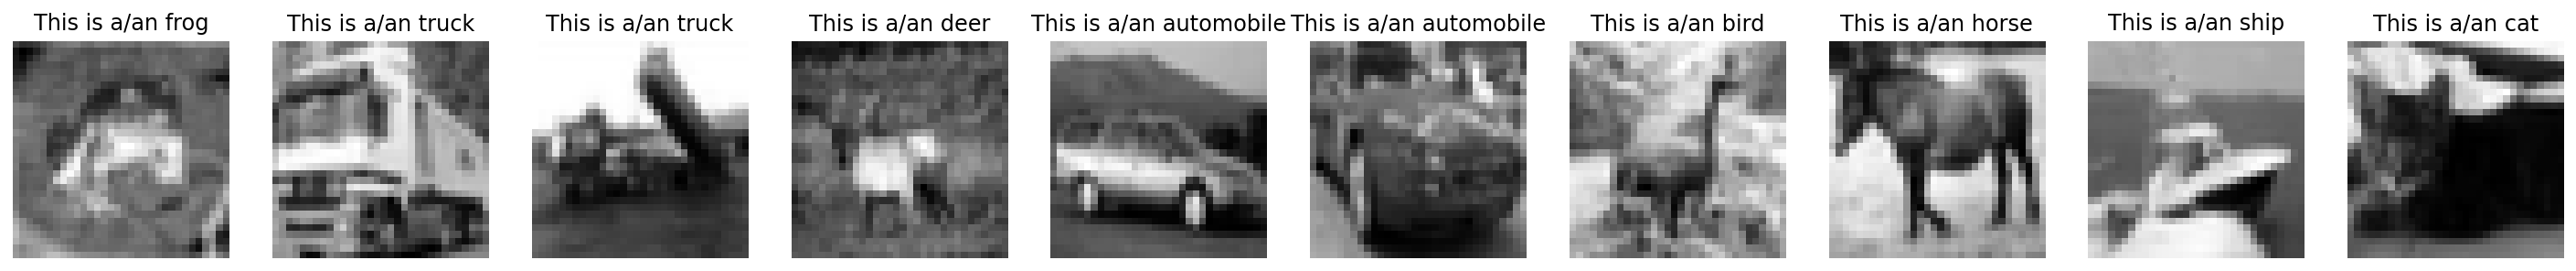

In [7]:
plt.figure(figsize=[25,3])
for i in np.arange(10): 
    ax = plt.subplot(1, 10, i+1)
    ax.imshow(X_train_gray[i,:,:],'gray')
    ax.set_title('This is a/an '+cifar_10_classes[y_train[i,0]])
    ax.axis('off')

## Averaging and edge detection (stride = 1)

In [8]:
def convolution2d(image, kernel, s = 1, max = False):
    # 2d spatial convolution for a given kernel
    # s is the stride
    m, n = kernel.shape
    y, x = image.shape
    y_out = np.int((y - m)/s + 1)
    x_out  = np.int((x - n)/s + 1)
    new_image = np.zeros((y_out, x_out))
    for i in range(y_out):
        for j in range(x_out):
            if max: 
                new_image[i][j] = np.max(image[(i*s):(i*s)+m, (j*s):(j*s)+n])
            else: 
                new_image[i][j] = np.sum(image[(i*s):(i*s)+m, (j*s):(j*s)+n]*kernel)
    return new_image

Here we propose three different 3x3 filters: averaging, horizontal derivative (edge x), vertical derivative (edge y)

(-0.5, 2.5, 2.5, -0.5)

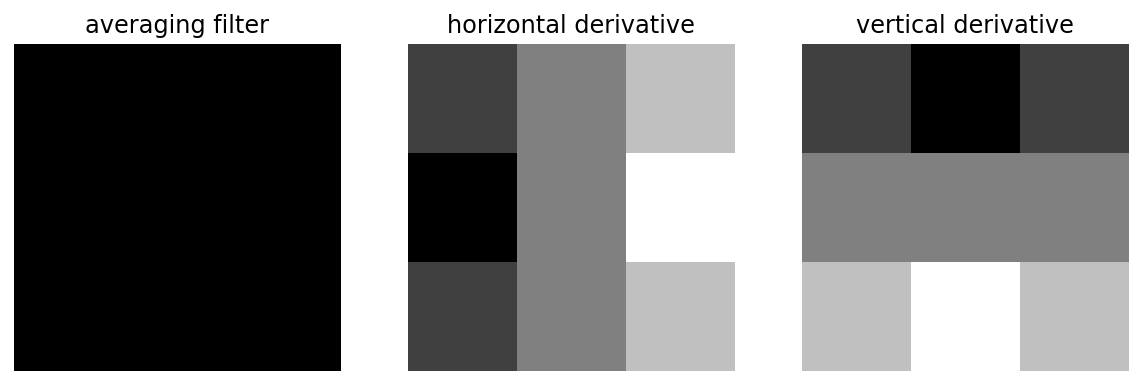

In [9]:
kernel_mean = np.ones((3,3))/(3*3) # averaging filter
kernel_edge_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # horizontal derivative
kernel_edge_y = kernel_edge_x.T # vertical derivative

# visualizing three filters
fig = plt.figure(figsize=[10,3])
ax= plt.subplot(1, 3, 1)
ax.imshow(kernel_mean,'gray')
ax.set_title('averaging filter')
ax.axis('off')
ax = plt.subplot(1, 3, 2)
ax.imshow(kernel_edge_x,'gray')
ax.set_title('horizontal derivative')
ax.axis('off')
ax = plt.subplot(1, 3, 3)
ax.imshow(kernel_edge_y,'gray')
ax.set_title('vertical derivative')
ax.axis('off')

Apply these 3x3 filters, stride 1

Input size 32 x 32, output size 30x30

Text(0.5, 0.98, 'vertical derivative')

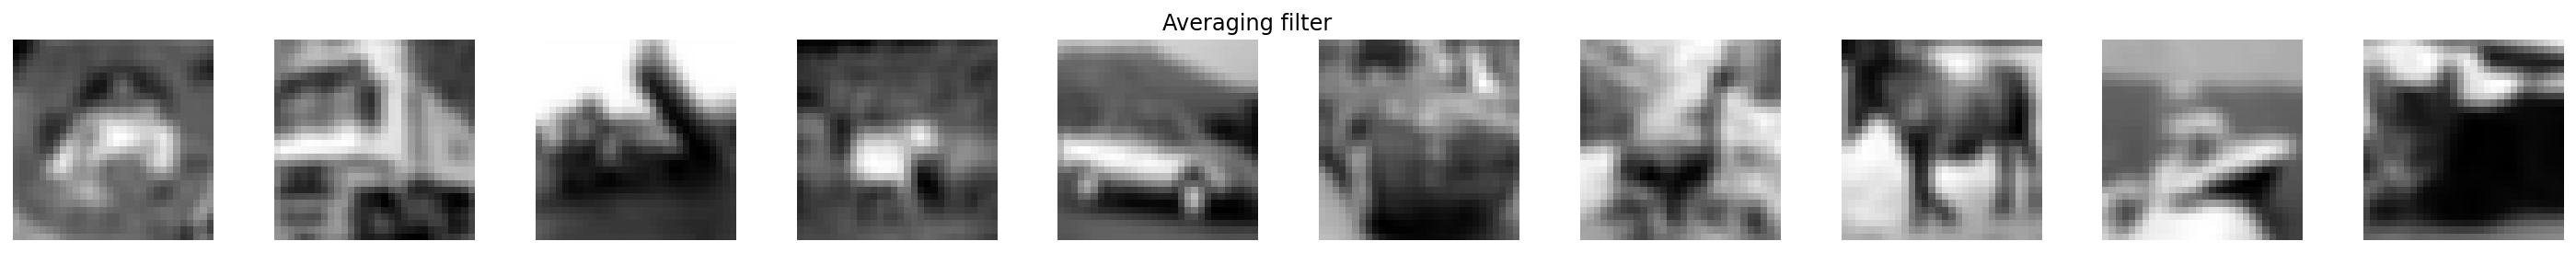

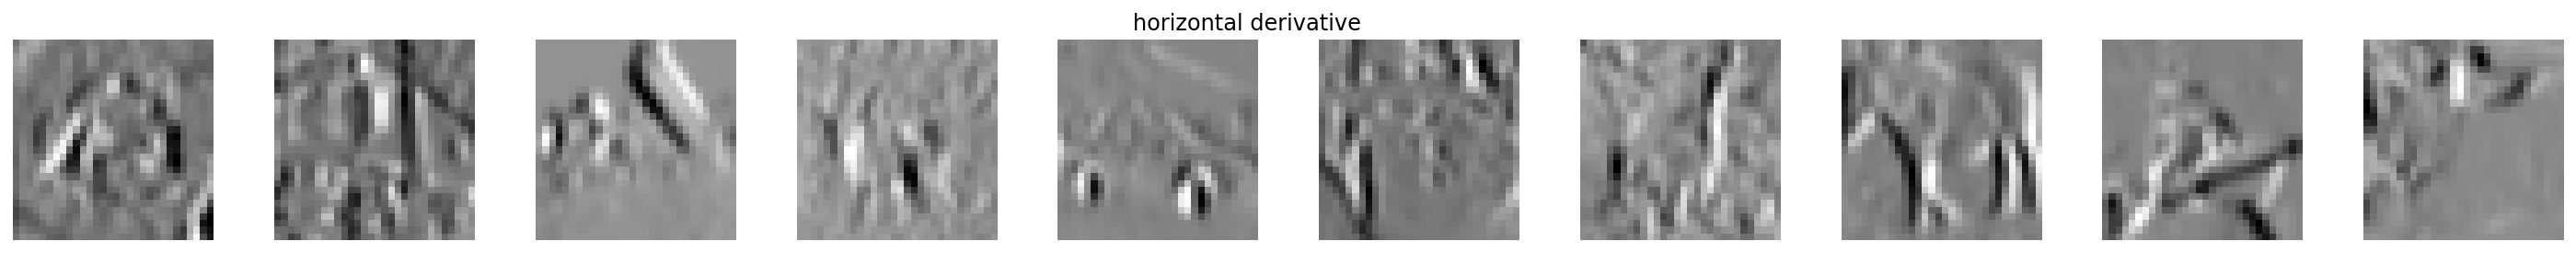

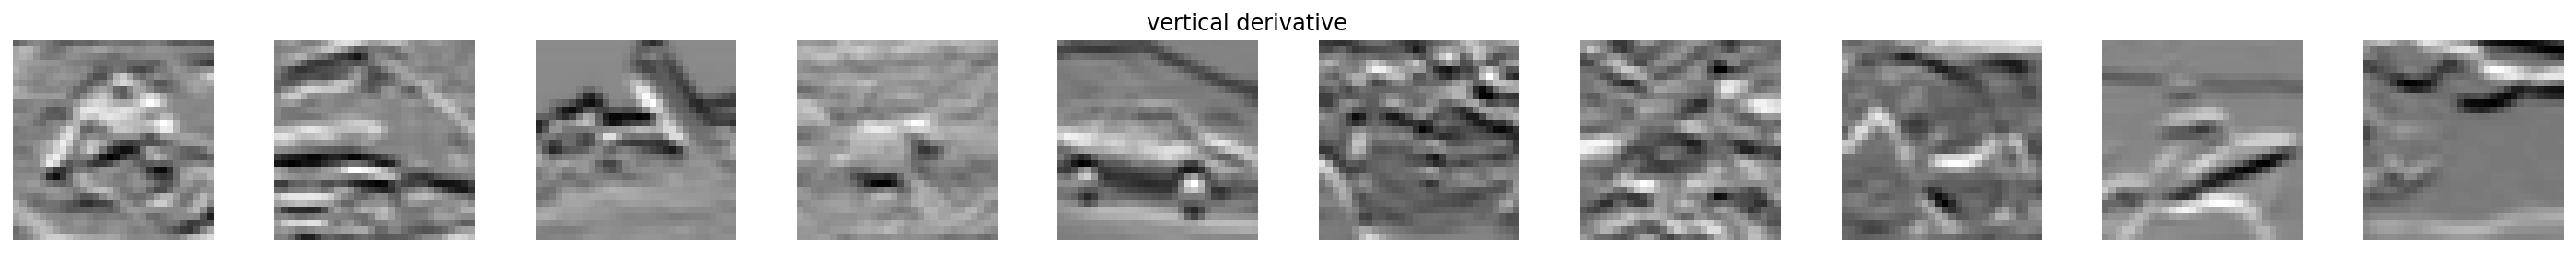

In [10]:
fig = plt.figure(figsize=[25,2])
for i in np.arange(10): 
    ax = plt.subplot(1, 10, i+1)
    ax.imshow(convolution2d(X_train_gray[i,:,:], kernel_mean),'gray')
    ax.axis('off')
fig.suptitle('Averaging filter')

fig = plt.figure(figsize=[25,2])
for i in np.arange(10): 
    ax = plt.subplot(1, 10, i+1)
    ax.imshow(convolution2d(X_train_gray[i,:,:], kernel_edge_x),'gray')
    ax.axis('off')
fig.suptitle('horizontal derivative')

fig = plt.figure(figsize=[25,2])
for i in np.arange(10): 
    ax = plt.subplot(1, 10, i+1)
    ax.imshow(convolution2d(X_train_gray[i,:,:], kernel_edge_y),'gray')
    ax.axis('off')
fig.suptitle('vertical derivative')

In fact, we can train these filters (any values, not limited to the filters we saw earlier) in our ConvNets and obtain many different processed feature maps. These feature maps help us perform the classification task. 

# 2. Pooling layers: downsampling 

## Maxpooling and average pooling (stride = 2)

Apply maxpooling (2x2) and average pooling (2x2), stride = 2

Input size 32 x 32, output size 16 x 16 (downsampling)

Text(0.5, 0.98, 'Average pooling')

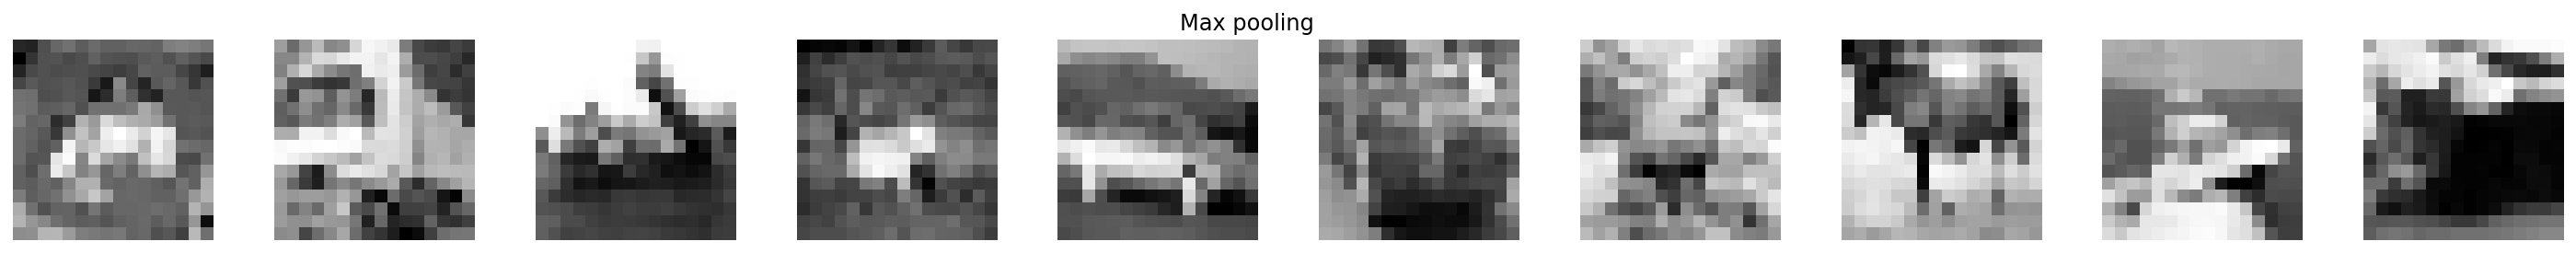

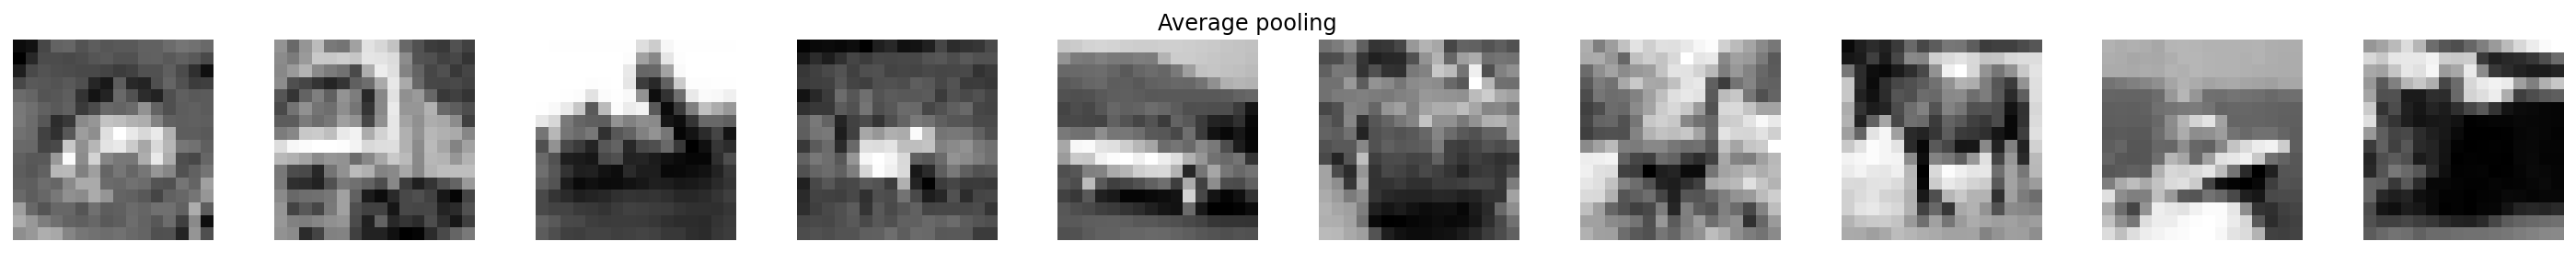

In [11]:
fig = plt.figure(figsize=[25,2])
kernel_maxpooling = np.ones((2,2))/(2*2) # dummy variable, not using
for i in np.arange(10): 
    ax = plt.subplot(1, 10, i+1)
    ax.imshow(convolution2d(X_train_gray[i,:,:], kernel_maxpooling, s = 2, max = True),'gray')
    ax.axis('off')
fig.suptitle('Max pooling')

fig = plt.figure(figsize=[25,2])
kernel_avepooling = np.ones((2,2))/(2*2)
for i in np.arange(10): 
    ax = plt.subplot(1, 10, i+1)
    ax.imshow(convolution2d(X_train_gray[i,:,:], kernel_avepooling, s = 2),'gray')
    ax.axis('off')
fig.suptitle('Average pooling')

# 3. Implement LeNet using Tensorflow and Keras

In [12]:
# Import modules from Tensorflow and Keras
from keras import optimizers,losses
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, AveragePooling2D


batch_size    = 32
epochs        = 20
lr = 5e-4

# Implement LeNet
def build_model():
    model = Sequential()
    # conv layer
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,3))) # 6: number of filters, (5, 5): filter/kernel size
    # average pooling
    model.add(AveragePooling2D((2, 2), strides=(2, 2))) # (2, 2): filter/kernel size
    # conv layer
    model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'))
    # average pooling
    model.add(AveragePooling2D((2, 2), strides=(2, 2)))
    # flatten image into vector
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal')) # 120: number of units
    model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    model.compile(loss=losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])
    return model

In [13]:
# build network
model = build_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

# 4. Training our first ConvNets!

In [14]:
# start train 
history = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,
                    validation_data=(X_test, y_test), shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 20s 4ms/step - loss: 9.9121 - accuracy: 0.1747 - val_loss: 1.8146 - val_accuracy: 0.3400
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7463 - accuracy: 0.3638 - val_loss: 1.6502 - val_accuracy: 0.4021
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5618 - accuracy: 0.4368 - val_loss: 1.5747 - val_accuracy: 0.4358
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4496 - accuracy: 0.4806 - val_loss: 1.4765 - val_accuracy: 0.4684
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3759 - accuracy: 0.5085 - val_loss: 1.4341 - val_accuracy: 0.4914
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2937 - accuracy: 0.5385 - val_loss: 1.4179 - val_accuracy: 0.4995
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2342 - accuracy: 0.5587 - val_loss: 1.4088 - val_accuracy

## Summarize history for accuracy and loss

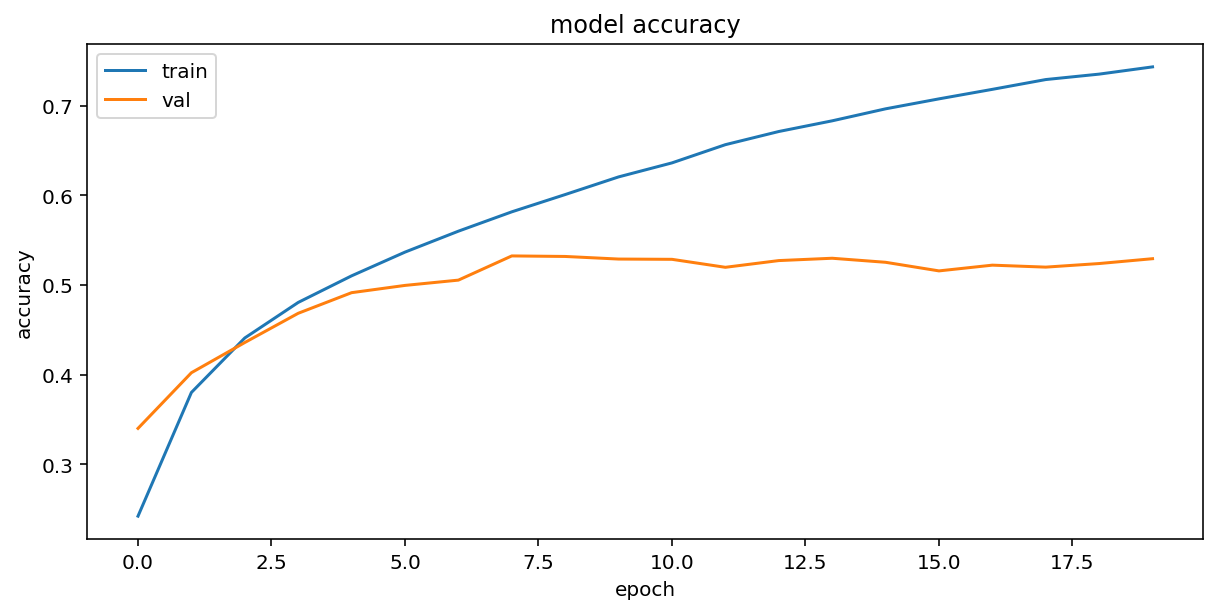

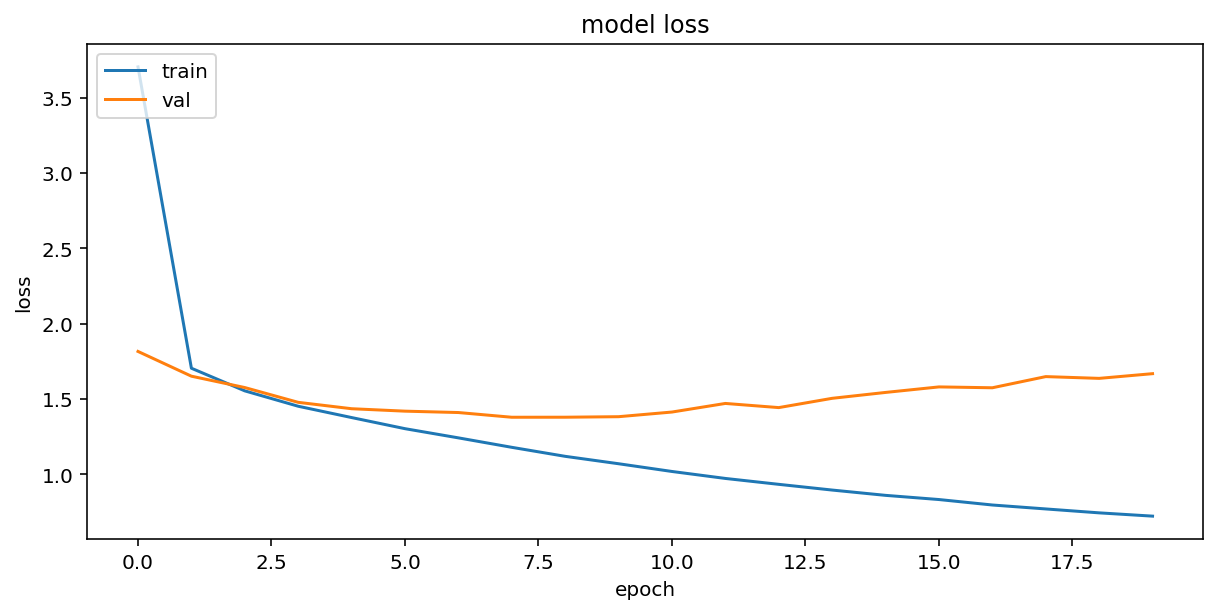

In [15]:
# summarize history for accuracy
plt.figure(figsize=[10,10])
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=[10,10])
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Yes. There is an overfitting issue. We can add [dropout layer](https://keras.io/api/layers/regularization_layers/dropout/) or add [regularizations](https://keras.io/api/layers/regularizers/) to mitigate the problem. (not covered in this notebook) 

## Visualize the prediction result

Confusion matrix

Text(0.5, 1.0, 'Validation set: accuracy 0.53')

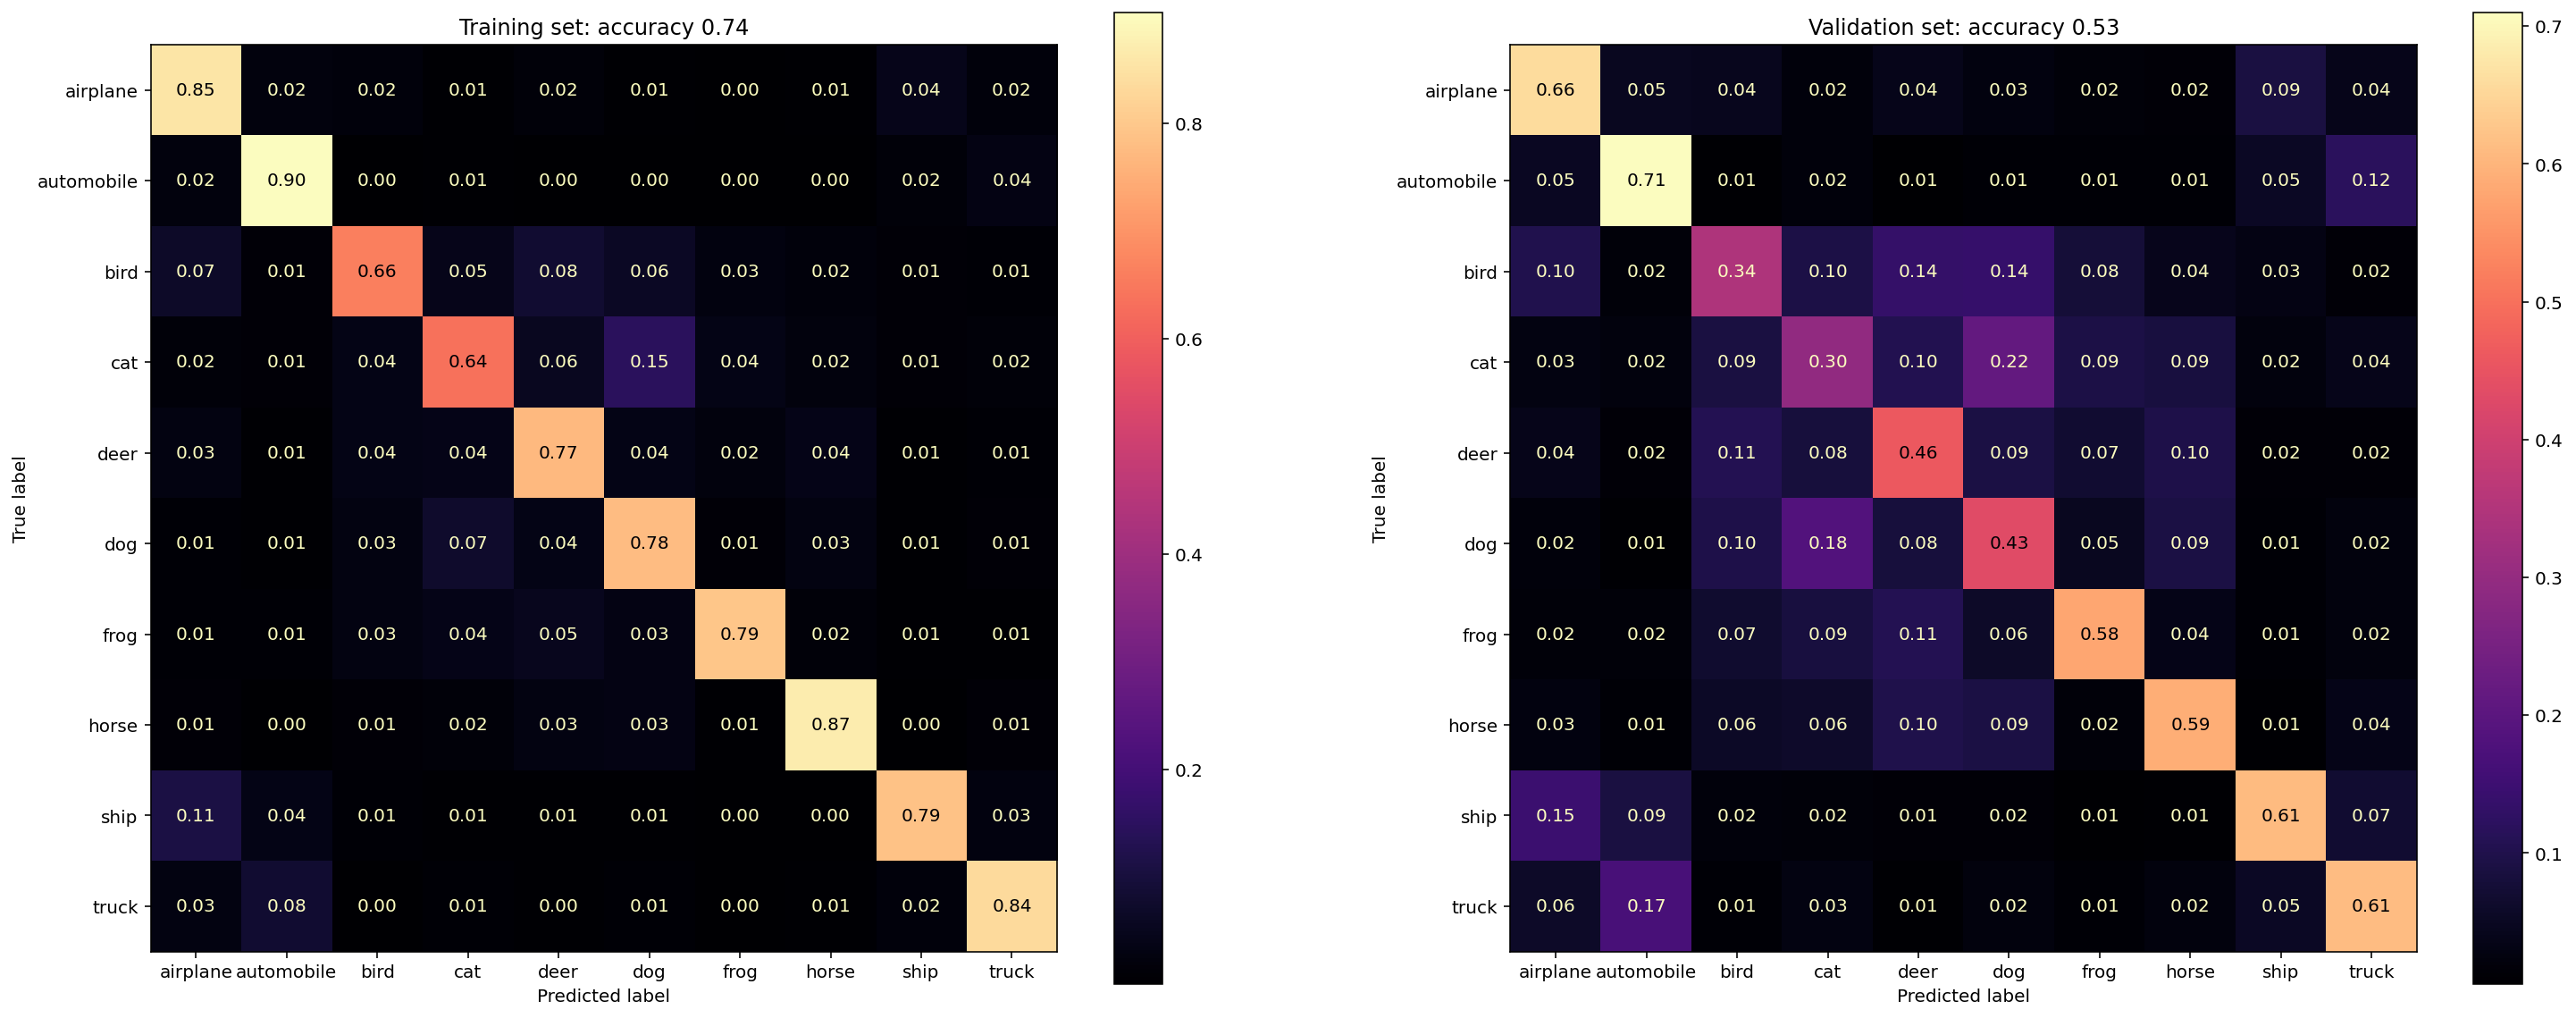

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
f, (ax1, ax2) = plt.subplots(1,2, figsize=(25, 10))

# Confusion matrix: training set
y_pred_train = np.argmax(model.predict(X_train),axis = 1) # predict by our model
cm = confusion_matrix(y_train[:,0], y_pred_train, labels=np.unique(y_train),normalize = 'true') # calculate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cifar_10_classes) # plot confusion matrix
disp.plot(values_format='.2f',ax = ax1, cmap = 'magma') 
ax1.set_title('Training set: accuracy '+str(np.round(history.history['accuracy'][-1],2)))

# Confusion matrix: validation set
y_pred_test = np.argmax(model.predict(X_test),axis = 1) # predict by our model
cm = confusion_matrix(y_test[:,0], y_pred_test, labels=np.unique(y_test),normalize = 'true') # calculate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cifar_10_classes) # plot confusion matrix
disp.plot(values_format='.2f',ax = ax2, cmap = 'magma') 
ax2.set_title('Validation set: accuracy '+str(np.round(history.history['val_accuracy'][-1],2)))

Predicted probability for each class

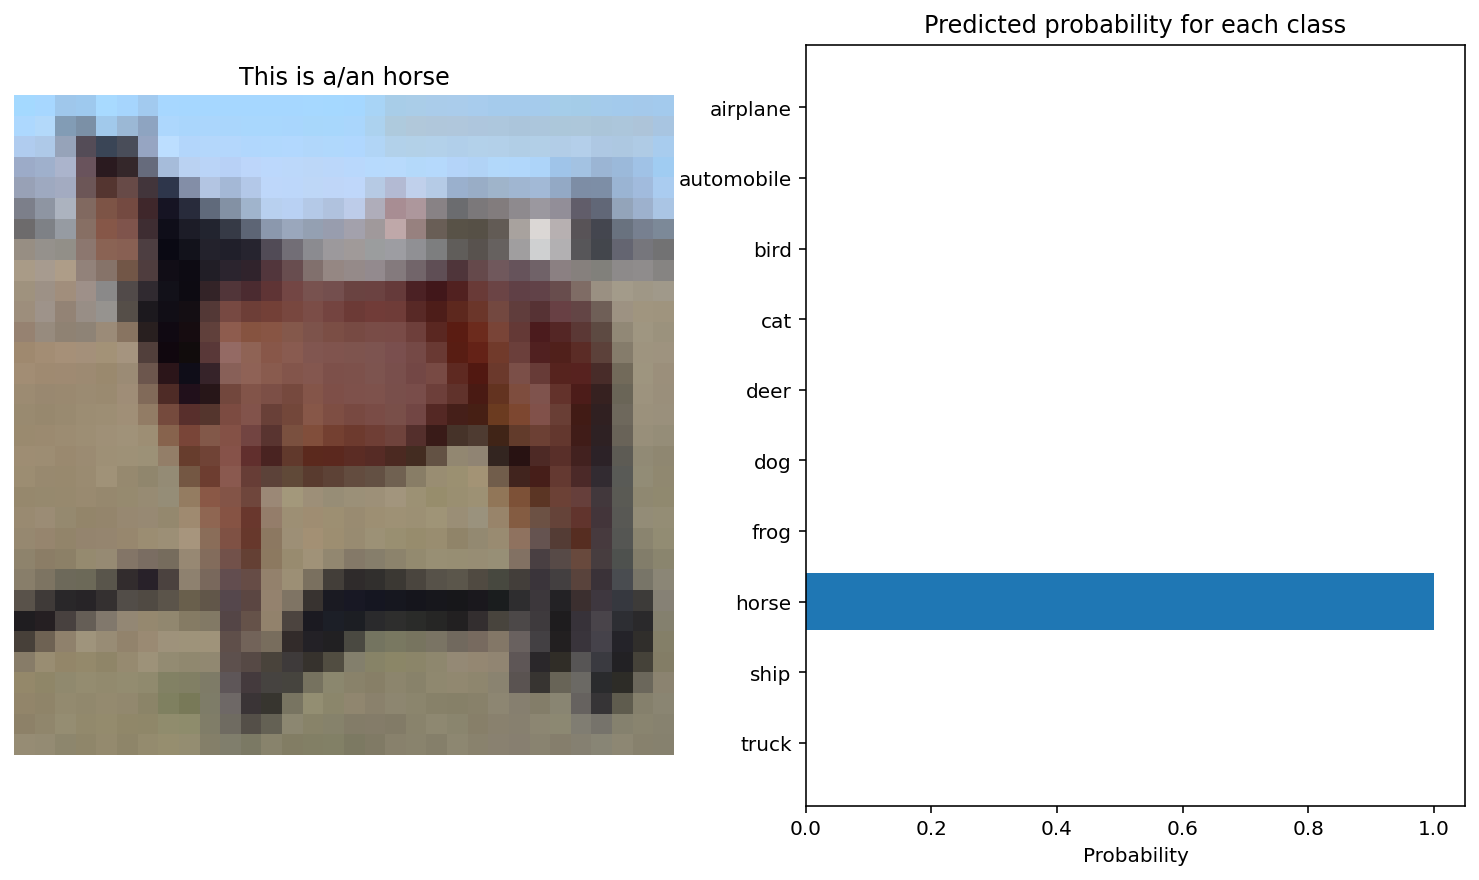

In [17]:
i = 800
# Predict the probability and visualize that
input_image = X_test[i:(i+1),:,:,:]
output_true_label = y_test[i][0]
output_probability = model.predict(input_image) # prediction

f, (ax1, ax2) = plt.subplots(1,2, figsize=(13, 7))
# visualize input
ax1.imshow(input_image[0,:,:,:])
ax1.set_title('This is a/an '+cifar_10_classes[output_true_label])
ax1.axis('off')

# visualize predicted probabilities (output of softmax)
y_pos = np.arange(len(cifar_10_classes))
ax2.barh(y_pos, output_probability[0,:], align='center')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(cifar_10_classes)
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_xlabel('Probability')
ax2.set_title('Predicted probability for each class')

plt.show()

**Exercise (10 mins)**: Can you design a new architecture, modifying activation functions, number of conv/pooling layers, the filter size of conv layers in 

```
def build_model():
```

 and see how that works? No need to beat the current model.

# 5. Transfer Learning: stand on the shoulder of the giants


Here we use the pretrained ResNet-50 as the feature extractor to generate useful features for classification. 

We load [ResNet-50](https://arxiv.org/abs/1512.03385) weights pre-trained on [ImageNet](https://image-net.org/). We exclude the ImageNet classifier at the top, because ImageNet has more than 20,000 classes and CIFAR-10 only have 10. 

In [18]:
# Load ResNet-50 weights pre-trained on ImageNet.
base_model = keras.applications.ResNet50(weights='imagenet',  
                                         input_shape=(32, 32, 3),
                                         include_top=False)  # Do not include the ImageNet classifier at the top.

Create a new model with the feature extractor as the base, and top with the Dense layer to perform classification. 

In [19]:
# Design the transfer learning structure
## We freeze (trainable = False) the pretrained weight for ResNet-50
base_model.trainable = False

## input size for CIFAR-10: 32 x 32 x 3
inputs = keras.Input(shape=(32, 32, 3)) 
x = base_model(inputs, training=False)

## Convert spatial features to vectors, you can also use Flatten()
x = keras.layers.GlobalAveragePooling2D()(x)

## Custom layer: A Dense classifier with softmax activation(classification)
outputs = keras.layers.Dense(10, activation = 'softmax')(x)

## Build the new model:tl_model
tl_model = keras.Model(inputs, outputs)
tl_model.compile(loss=losses.SparseCategoricalCrossentropy(), 
                 optimizer=keras.optimizers.Adam(learning_rate=lr),
                 metrics=['accuracy'])

Train the new model with CIFAR-10 data. Here we freeze the pretrained layer, we just train the custom layer. Here we only train 3 epochs (to save time), you can train more epochs if you prefer. 

In [20]:
# start train: just train the custom layer
tl_model.fit(X_train, y_train, batch_size=batch_size,
             epochs=3,validation_data=(X_test, y_test), shuffle=True)

Epoch 1/3
1563/1563 [==============================] - 31s 18ms/step - loss: 1.5372 - accuracy: 0.5158 - val_loss: 1.2920 - val_accuracy: 0.5677
Epoch 2/3
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1746 - accuracy: 0.6030 - val_loss: 1.2100 - val_accuracy: 0.6003
Epoch 3/3
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0887 - accuracy: 0.6288 - val_loss: 1.2178 - val_accuracy: 0.5999


## Finetuning

Since we have a lot of data from CIFAR-10, we can also retrain the whole model end-to-end with a very low learning rate (10x smaller). We don't want to have a huge learning rate and deviate from what we have trained so far. 

In [21]:
# We unfreeze (trainable = True) the pretrained weight for ResNet-50
base_model.trainable = True

# We recompile the model to enable trainable = True
# retrain the whole model end-to-end with a very low learning rate
finetuning_lr = 5e-5
tl_model.compile(loss=losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=finetuning_lr), metrics=['accuracy'])

Here we only train 3 epochs (to save time), you can train more epochs if you prefer. 

In [22]:
# start train: finetune/train the custom and pretrained layer
tl_history = tl_model.fit(X_train, y_train, batch_size=batch_size,
                          epochs=3,validation_data=(X_test, y_test), shuffle=True)

Epoch 1/3
1563/1563 [==============================] - 76s 45ms/step - loss: 0.8073 - accuracy: 0.7203 - val_loss: 0.6563 - val_accuracy: 0.7710
Epoch 2/3
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4994 - accuracy: 0.8252 - val_loss: 0.5649 - val_accuracy: 0.8065
Epoch 3/3
1563/1563 [==============================] - 68s 44ms/step - loss: 0.3382 - accuracy: 0.8819 - val_loss: 0.5463 - val_accuracy: 0.8225


## Visualize the prediction result

Confusion matrix

Text(0.5, 1.0, 'Validation set: accuracy 0.82')

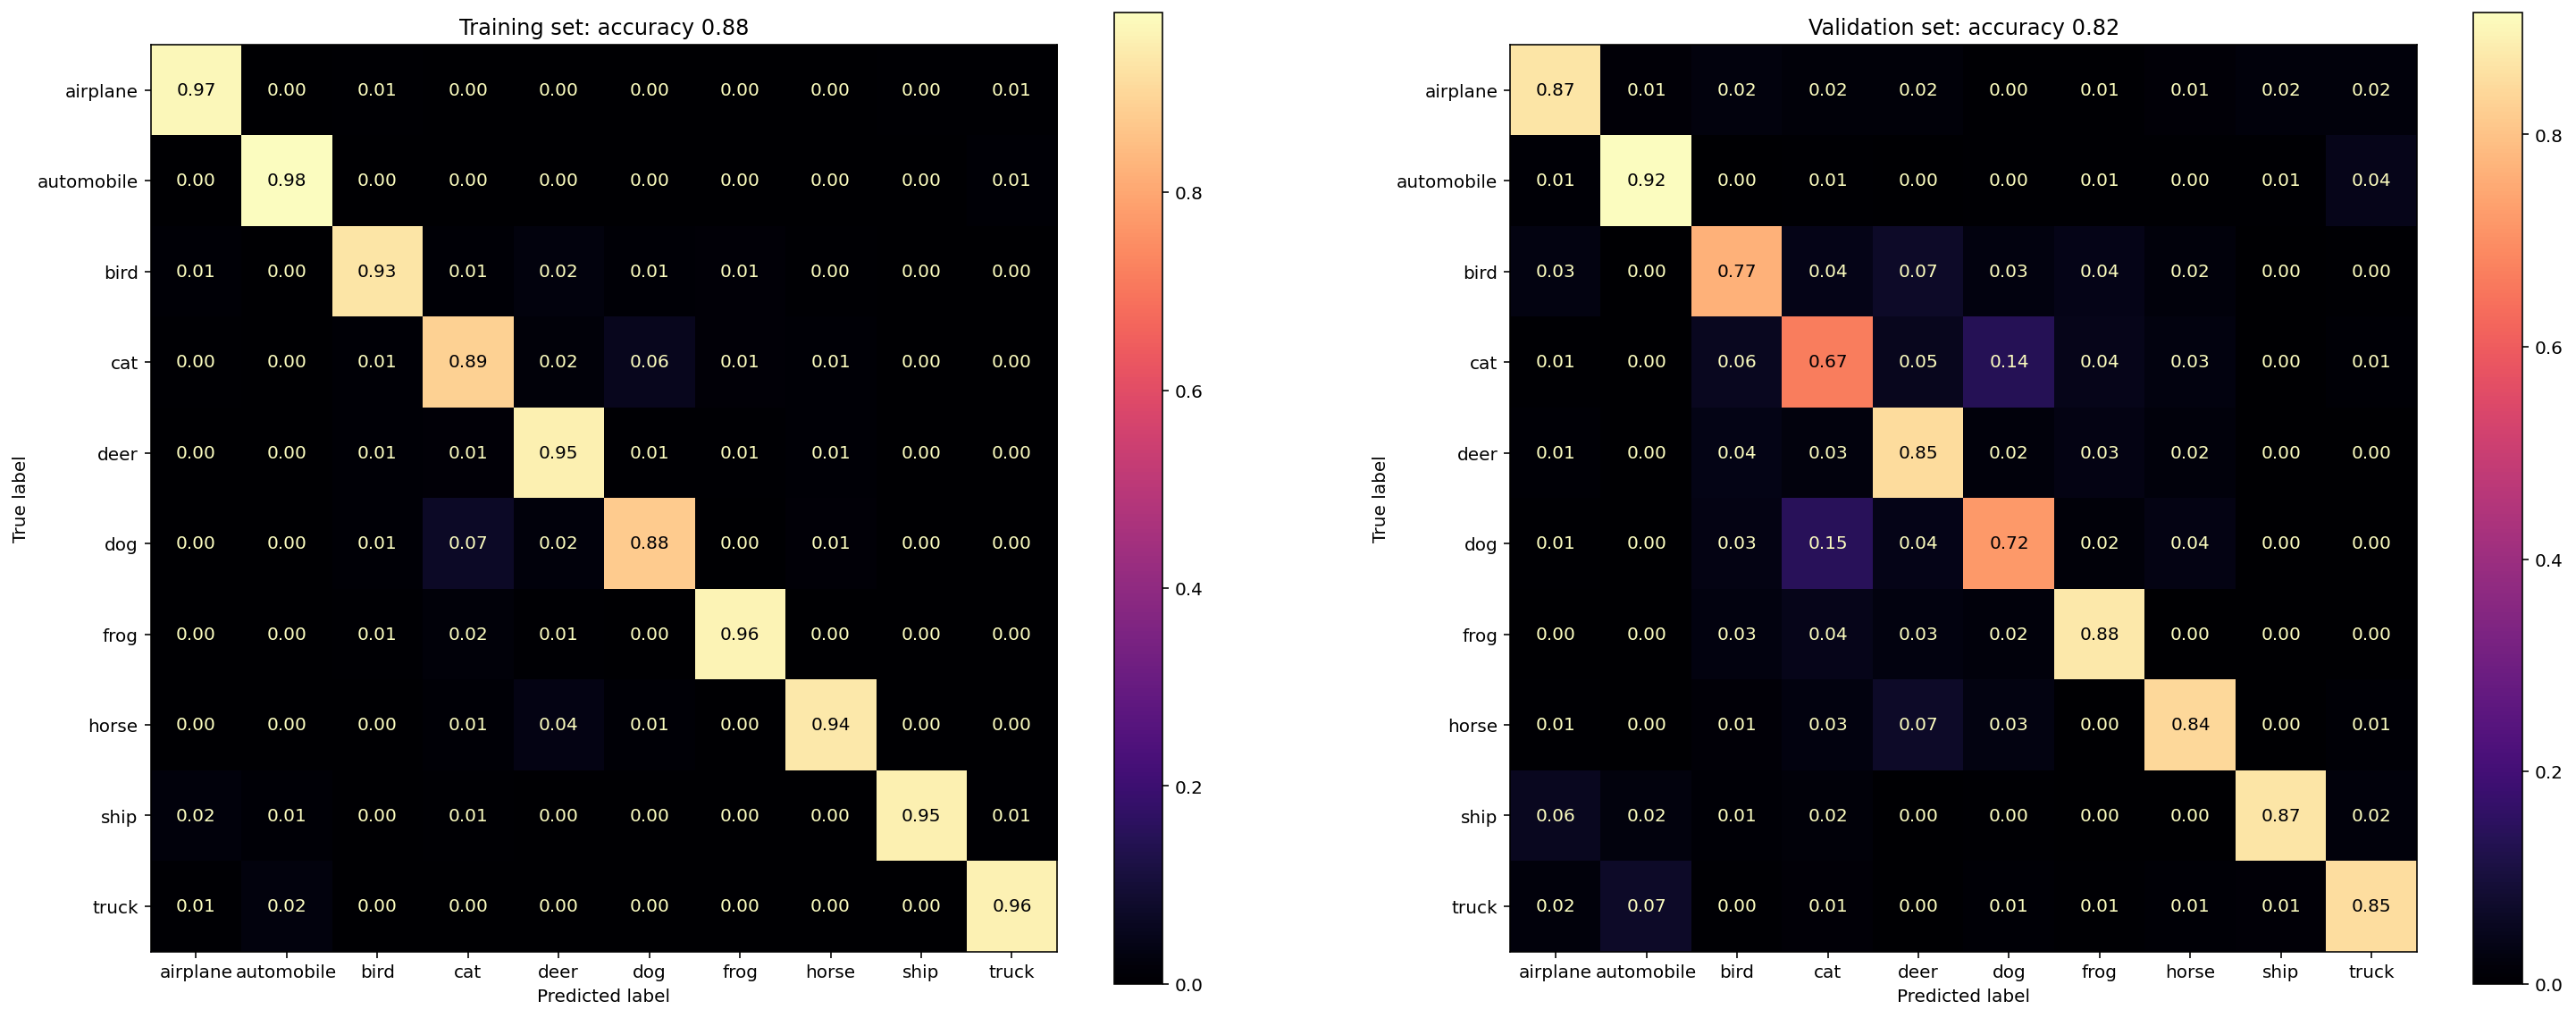

In [23]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(25, 10))

# Confusion matrix: training set
y_pred_train = np.argmax(tl_model.predict(X_train),axis = 1) # predict by our model
cm = confusion_matrix(y_train[:,0], y_pred_train, labels=np.unique(y_train),normalize = 'true') # calculate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cifar_10_classes) # plot confusion matrix
disp.plot(values_format='.2f',ax = ax1, cmap = 'magma') 
ax1.set_title('Training set: accuracy '+str(np.round(tl_history.history['accuracy'][-1],2)))

# Confusion matrix: validation set
y_pred_test = np.argmax(tl_model.predict(X_test),axis = 1) # predict by our model
cm = confusion_matrix(y_test[:,0], y_pred_test, labels=np.unique(y_test),normalize = 'true') # calculate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cifar_10_classes) # plot confusion matrix
disp.plot(values_format='.2f',ax = ax2, cmap = 'magma') 
ax2.set_title('Validation set: accuracy '+str(np.round(tl_history.history['val_accuracy'][-1],2)))